<a href="https://colab.research.google.com/github/Kammara-Kaveri/elevatelabs/blob/main/ml_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving house-prices-advanced-regression-techniques.zip to house-prices-advanced-regression-techniques.zip


In [3]:
import os
os.listdir()


['.config', 'house-prices-advanced-regression-techniques.zip', 'sample_data']

In [7]:
import zipfile

# Path to the uploaded zip file
zip_file = 'house-prices-advanced-regression-techniques.zip'

# Extract the contents of the zip file to the current directory
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall()  # Extract all files

# List the extracted files
import os
os.listdir()


['.config',
 'train.csv',
 'data_description.txt',
 'sample_submission.csv',
 'test.csv',
 'house-prices-advanced-regression-techniques.zip',
 'sample_data']

In [8]:
# Load the dataset
df = pd.read_csv('train.csv')

# Show the first few rows to confirm it's loaded correctly
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
# Check for missing values in the dataset
df.isnull().sum()


,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [10]:
# Summary statistics
df.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
# Select features and target
X = df[['OverallQual', 'GrLivArea', 'GarageCars', 'TotRmsAbvGrd']]  # Example features
y = df['SalePrice']  # Target variable


In [12]:
from sklearn.model_selection import train_test_split

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:

from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)



LinearRegression()

In [14]:
#. Make Predictions:
#Now we’ll use the trained model to make predictions on the test set:
# Predict on the test data
y_pred = model.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')


Mean Absolute Error (MAE): 28172.958886851564
Mean Squared Error (MSE): 1841302184.1775649
R-squared (R²): 0.759944735798556


In [17]:
# Use only the 'OverallQual' feature for training
X_train_single_feature = X_train[['OverallQual']]

# Refit the model with only 'OverallQual'
model = LinearRegression()
model.fit(X_train_single_feature, y_train)


LinearRegression()

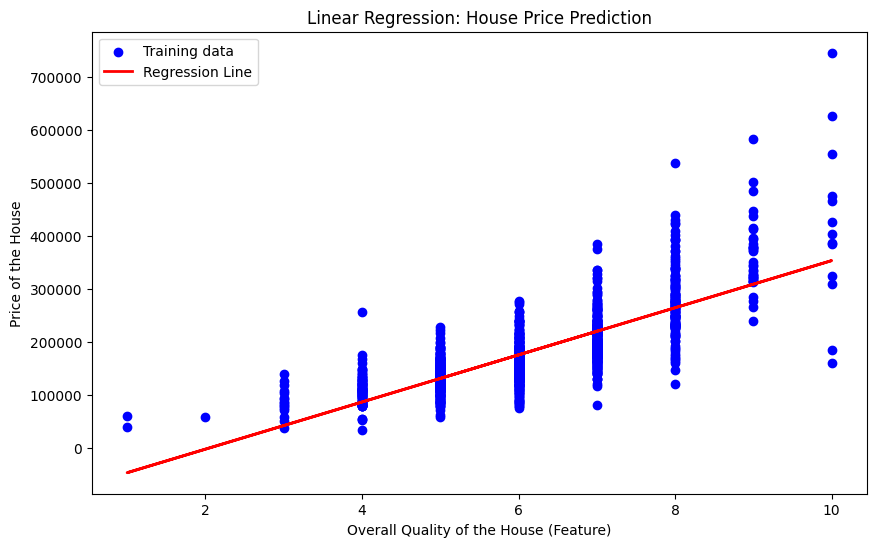

In [18]:
import matplotlib.pyplot as plt

# Visualize the regression line for a single feature
plt.figure(figsize=(10, 6))

# Scatter plot of training data (x-axis: OverallQual, y-axis: House Price)
plt.scatter(X_train['OverallQual'], y_train, color='blue', label='Training data')

# Plot the regression line (predictions based on 'OverallQual' feature)
plt.plot(X_train['OverallQual'], model.predict(X_train_single_feature), color='red', linewidth=2, label='Regression Line')

# Labels and title
plt.xlabel('Overall Quality of the House (Feature)')
plt.ylabel('Price of the House')
plt.title('Linear Regression: House Price Prediction')

# Show legend
plt.legend()

# Display the plot
plt.show()


In [19]:
# Print the intercept and coefficient
print("Intercept (β₀):", model.intercept_)
print("Coefficient (β₁ for OverallQual):", model.coef_[0])


Intercept (β₀): -90233.22290028064
Coefficient (β₁ for OverallQual): 44379.87767098291
